/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Termo x^1 = -0.09538701921701431
Termo x^2 = -0.37939801812171936
Termo x^3 = -0.2611013948917389
Termo x^4 = 0.12684758007526398
Termo x^5 = 0.07817428559064865
Termo x^6 = -0.3944994807243347
Termo x^7 = -0.30946633219718933
Termo x^8 = 0.07311688363552094
Termo x^9 = -0.06441453099250793
Termo x^10 = 1.30524742603302
Termo x^11 = 0.3256834149360657
Termo x^12 = 1.7503306865692139
Constante = 0.7756218910217285
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


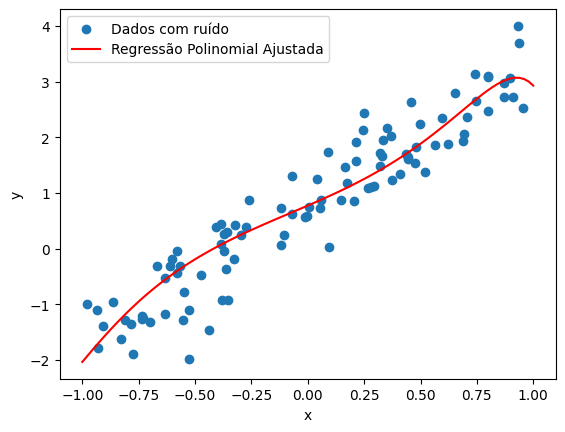

In [ ]:
#f(x) = ax^12 + bx^11 + cx^10...polinomial

import tensorflow as tf
import matplotlib.pyplot as plt

a_real = 2.5
b_real = 0.8

tf.random.set_seed(42)
x_train = tf.random.uniform([100], minval=-1, maxval=1)
noise = tf.random.normal([100], mean=0.0, stddev=0.5)
y_train = a_real * x_train + b_real + noise

X_train_poly = tf.stack([x_train**i for i in range(12, 0, -1)], axis=1)

model_poly = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[12])
])

model_poly.compile(optimizer='sgd', loss='mae')

history = model_poly.fit(X_train_poly, y_train, epochs=500, verbose=0)

pesos = model_poly.layers[0].get_weights()[0]
intercepto = model_poly.layers[0].get_weights()[1][0]

parametros_estimados = [f"Termo x^{i+1} = {pesos[i][0]}" for i in range(12)] + [f"Constante = {intercepto}"]
for param in parametros_estimados:
    print(param)


x_test = tf.linspace(-1.0, 1.0, 100)
X_test_poly = tf.stack([x_test**i for i in range(12, 0, -1)], axis=1)
y_pred_poly = model_poly.predict(X_test_poly)

plt.scatter(x_train, y_train, label="Dados com ruído")
plt.plot(x_test, y_pred_poly, color='red', label="Regressão Polinomial Ajustada")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Número de execuções: 11978
Valor final de a: 20.33543795307776
Valor final de b: 19.639359286981698
Acurácia: 0.83
F1-Score: 0.8811188811188811


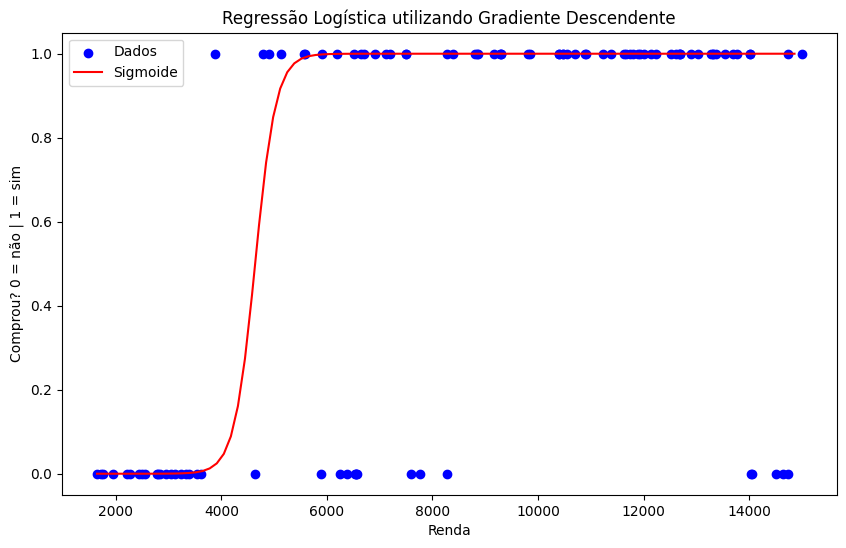

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

Base_Dados = pd.read_excel('/content/dados_rglog.xlsx')

datasetx = Base_Dados['Renda'].values
datasety = Base_Dados['Comprou?'].values

def normalize(data):
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = math.sqrt(variance)
    return [(x - mean) / std_dev for x in data]

datasetx_normalized = normalize(datasetx)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def gradDS(datasetx, datasety, a, b):
    grad_a = 0
    grad_b = 0
    for i in range(len(datasetx)):
        pred = sigmoid(a * datasetx[i] + b)
        grad_a += 2 * (datasety[i] - pred) * (-datasetx[i]) * pred * (1 - pred)
        grad_b += 2 * (datasety[i] - pred) * (-1) * pred * (1 - pred)
    return grad_a, grad_b

def dist2(x_n, y_n, x_0, y_0):
    return math.sqrt((x_n - x_0) ** 2 + (y_n - y_0) ** 2)

def gradienteDescendenteDS(a_0, b_0, tol, lr):
    x_n = a_0
    y_n = b_0
    i = 0
    while True:
        grad_a, grad_b = gradDS(datasetx_normalized, datasety, x_n, y_n)
        x_n1 = x_n - lr * grad_a
        y_n1 = y_n - lr * grad_b
        i += 1
        err = dist2(x_n1, y_n1, x_n, y_n)
        if err <= tol or i >= 999999:
            break
        x_n = x_n1
        y_n = y_n1
    return i, x_n, y_n

n_iter, a_final, b_final = gradienteDescendenteDS(20, 20, tol=1e-6, lr=0.001)

preds = [1 if sigmoid(a_final * x + b_final) >= 0.5 else 0 for x in datasetx_normalized]
accuracy = sum(1 for i in range(len(datasety)) if datasety[i] == preds[i]) / len(datasety)
f1_num = sum(2 * preds[i] * datasety[i] for i in range(len(datasety)))
f1_denom = sum(preds) + sum(datasety)
f1 = f1_num / f1_denom if f1_denom != 0 else 0

print("Número de execuções:", n_iter)
print("Valor final de a:", a_final)
print("Valor final de b:", b_final)
print("Acurácia:", accuracy)
print("F1-Score:", f1)

plt.figure(figsize=(10, 6))
plt.scatter(datasetx, datasety, color='blue', label='Dados')

renda_vals = [min(datasetx) + i * (max(datasetx) - min(datasetx)) / 100 for i in range(100)]
pred_sigmoid = [sigmoid(a_final * ((renda - sum(datasetx) / len(datasetx)) / math.sqrt(sum((x - sum(datasetx) / len(datasetx)) ** 2 for x in datasetx) / len(datasetx))) + b_final) for renda in renda_vals]

plt.plot(renda_vals, pred_sigmoid, color='red', label='Sigmoide')
plt.xlabel('Renda')
plt.ylabel('Comprou? 0 = não | 1 = sim')
plt.title('Regressão Logística utilizando Gradiente Descendente')
plt.legend()
plt.show()


<ipython-input-4-d21e0787700f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_obitos['AnoMes'] = dados_obitos['DT_OBITO'].dt.to_period('M')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-4-d21e0787700f>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses_2023_obitos = pd.date_range(start='2023-01-01', periods=12, freq='M')
<ipython-input-4-d21e0787700f>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='2023-01-01', periods=12, freq='M'))


Previsões de óbitos para 2023: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Dados reais de óbitos para 2023: [0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0]
MAE: 0.4167, MSE: 0.5556


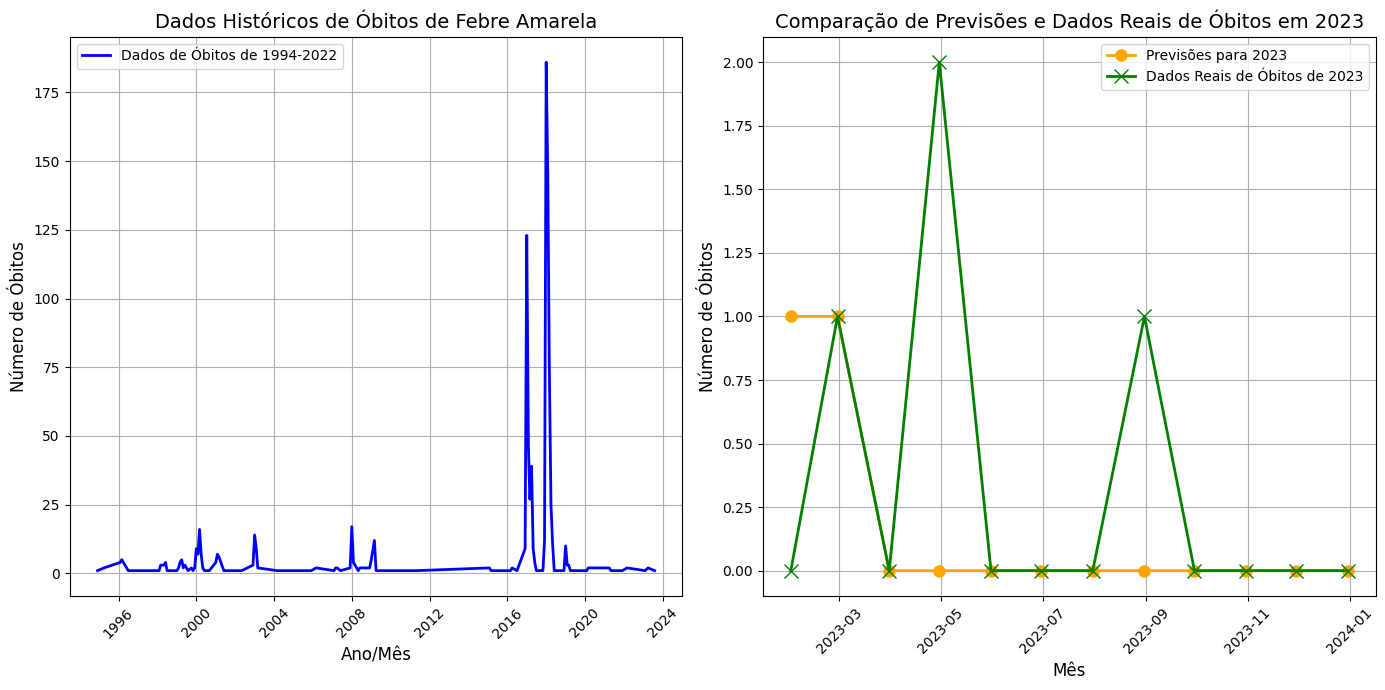

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import random

seed_value = 42
random.seed(seed_value)
tf.random.set_seed(seed_value)

def carregar_e_processar_dados_obitos():
    arquivo = '/content/fa_casoshumanos_1994-2023.csv'
    dados = pd.read_csv(arquivo, sep=';', encoding='ISO-8859-1')
    dados['DT_OBITO'] = pd.to_datetime(dados['DT_OBITO'], format='%d/%m/%Y', errors='coerce')
    dados_obitos = dados.dropna(subset=['DT_OBITO'])
    dados_obitos['AnoMes'] = dados_obitos['DT_OBITO'].dt.to_period('M')
    obitos_por_mes = dados_obitos.groupby('AnoMes').size()
    return obitos_por_mes

obitos_por_mes = carregar_e_processar_dados_obitos()
dados_completos_obitos = obitos_por_mes.to_frame(name='Obitos').reset_index()
dados_completos_obitos['AnoMes'] = dados_completos_obitos['AnoMes'].dt.to_timestamp()

dados_ate_2022_obitos = dados_completos_obitos[dados_completos_obitos['AnoMes'] < '2023-01-01']

max_obitos = tf.reduce_max(tf.convert_to_tensor(dados_ate_2022_obitos['Obitos'].tolist(), dtype=tf.float32))
X_train_obitos = tf.convert_to_tensor([[i] for i in range(len(dados_ate_2022_obitos))], dtype=tf.float32)
y_train_obitos = tf.convert_to_tensor(dados_ate_2022_obitos['Obitos'].tolist(), dtype=tf.float32) / max_obitos

modelo = Sequential([
    Dense(512, activation='relu', input_shape=(1,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(1)
])

modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=21)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=9)

historico = modelo.fit(X_train_obitos, y_train_obitos, epochs=1000, verbose=0,
                        callbacks=[early_stopping, reduce_lr])

meses_2023_obitos = pd.date_range(start='2023-01-01', periods=12, freq='M')
X_test_obitos = tf.convert_to_tensor([[len(X_train_obitos) + i] for i in range(len(meses_2023_obitos))], dtype=tf.float32)
previsoes_2023_obitos = modelo.predict(X_test_obitos) * max_obitos

previsoes_2023_arredondadas = tf.round(tf.maximum(previsoes_2023_obitos, 0))

dados_reais_2023_obitos = pd.Series([0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0],
                                    index=pd.date_range(start='2023-01-01', periods=12, freq='M'))

dados_reais_2023_tensor = tf.convert_to_tensor(dados_reais_2023_obitos.tolist(), dtype=tf.float32)

mae = tf.reduce_mean(tf.abs(previsoes_2023_arredondadas - dados_reais_2023_tensor))
mse = tf.reduce_mean(tf.square(previsoes_2023_arredondadas - dados_reais_2023_tensor))

print("Previsões de óbitos para 2023:", list(map(int, tf.squeeze(previsoes_2023_arredondadas))))
print("Dados reais de óbitos para 2023:", list(map(int, dados_reais_2023_tensor)))
print(f"MAE: {float(mae):.4f}, MSE: {float(mse):.4f}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(dados_completos_obitos['AnoMes'], dados_completos_obitos['Obitos'], label='Dados de Óbitos de 1994-2022', color='blue', linewidth=2)
plt.title('Dados Históricos de Óbitos de Febre Amarela', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(meses_2023_obitos, list(map(int, tf.squeeze(previsoes_2023_arredondadas))), label='Previsões para 2023', color='orange', marker='o', markersize=8, linewidth=2)
plt.plot(dados_reais_2023_obitos.index, dados_reais_2023_obitos.values, label='Dados Reais de Óbitos de 2023', marker='x', color='green', markersize=10, linewidth=2)

plt.title('Comparação de Previsões e Dados Reais de Óbitos em 2023', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
